# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [33]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats
sns.set()

In [34]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [35]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\mouz\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


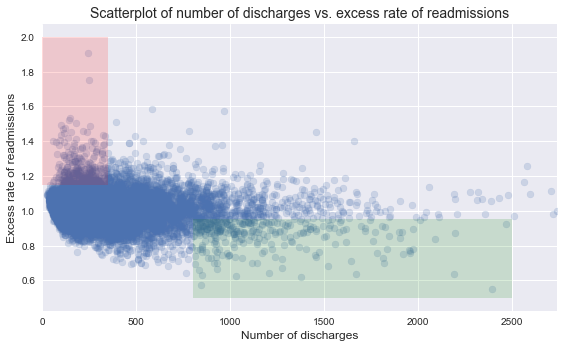

In [36]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

### EDA

In [37]:
df = clean_hospital_read_df
# create NANs where 'Excess Readmission Ratio' is NAN, remove all rows with NANs
df[df.loc[:, 'Excess Readmission Ratio'].isnull()] = np.nan
df = df.dropna(axis=0, how='all').reset_index(drop=True)

In [39]:
df.tail()
#df.State.nunique()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
11492,NAPLES COMMUNITY HOSPITAL,100018.0,FL,READM-30-HIP-KNEE-HRRP,2716.0,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
11493,COMMUNITY MEDICAL CENTER,310041.0,NJ,READM-30-COPD-HRRP,2740.0,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
11494,FLORIDA HOSPITAL,100007.0,FL,READM-30-HF-HRRP,3570.0,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
11495,NEW ENGLAND BAPTIST HOSPITAL,220088.0,MA,READM-30-HIP-KNEE-HRRP,3980.0,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
11496,HOSPITAL FOR SPECIAL SURGERY,330270.0,NY,READM-30-HIP-KNEE-HRRP,6793.0,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [40]:
df.groupby('State').mean().sort_values('Excess Readmission Ratio')

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
State,,,,,,,
SD,430031.560976,355.926829,NaN,0.909824,14.331707,15.643902,38.926829
MT,270028.636364,288.568182,NaN,0.910461,14.031818,15.354545,30.545455
ID,130017.425000,301.200000,NaN,0.918378,14.615000,15.890000,32.500000
ND,350018.793103,417.793103,NaN,0.919466,14.937931,16.031034,49.379310
NE,280061.370370,358.506173,NaN,0.931769,15.337037,16.228395,45.493827
OR,380041.833333,253.537037,NaN,0.943070,15.923148,16.750000,32.509259
VT,470008.238095,380.571429,NaN,0.947548,17.023810,17.842857,58.095238
UT,460020.679245,271.433962,NaN,0.951774,14.105660,15.003774,27.943396
CO,60042.830769,270.776923,NaN,0.952012,15.814615,16.681538,32.576923


For hospitals with < 300 discharges, mean Excess Readmission Ratio = 1.014

For hospitals with > 300 discharges, mean Excess Readmission Ratio = 1.000


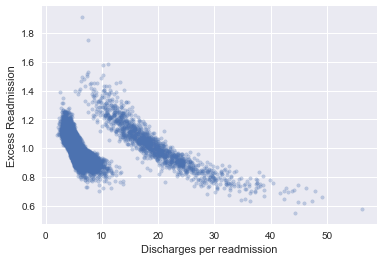

In [130]:
x = df['Number of Discharges'].values / df['Number of Readmissions'].values
y = df['Excess Readmission Ratio'].values 
plt.scatter(x, y, marker='.', alpha=0.3)
plt.xlabel('Discharges per readmission')
plt.ylabel('Excess Readmission')
#plt.xlim([x.min(), 40])
#plt.ylim([y.min(), 1.5])
plt.show()

Along the x-axis, we can see that there are more discharges for every readmission. From this we can conclude that higher discharge (large cap hospitals) tend have lower excess readmission rates. 

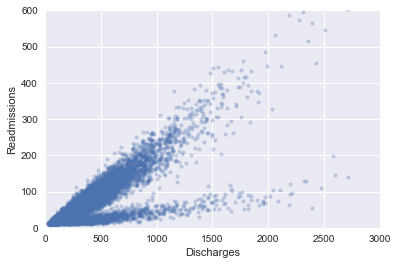

In [151]:
x = df['Number of Discharges'].values
y = df['Number of Readmissions'].values
plt.scatter(x, y, marker='.', alpha=0.3)
plt.xlabel('Discharges')
plt.ylabel('Readmissions')
plt.xlim([0, 3000])
plt.ylim([0, 600])
plt.show()

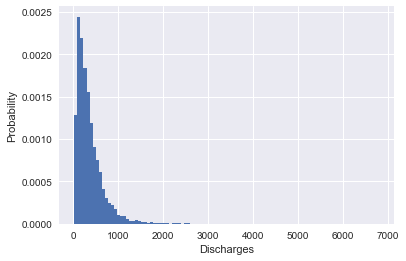

count    11497.000000
mean       365.466209
std        308.754590
min         25.000000
25%        160.000000
50%        282.000000
75%        474.000000
max       6793.000000
Name: Number of Discharges, dtype: float64


In [45]:
plt.hist(df['Number of Discharges'], normed=True, bins=100)
plt.xlabel('Discharges')
plt.ylabel('Probability')
plt.show()
print(df['Number of Discharges'].describe())

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Preliminary analysis points out that small cap (< 100) hospitals tend to have higher readmission rates but then provides recommendations for hospitals with capacity of less than 300. An appropriate hyposthesis test should be conducted in order show any statistical significance of Mean Excess Readmission Rates between small capacity and large capacity hospitals. Also, correlation between number of discharges and readmissions rates needs to be tested. 

In [62]:
np.random.seed(10)
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

def bootstrap_replicate_1d(data, func):
  '''Generate boostrap replicate of one-dim data '''
  bs_sample = np.random.choice(data, len(data))
  return func(bs_sample)

# generate many bootstrap replicates from the data set
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates


In [63]:
# create NANs where 'Excess Readmission Ratio' is NAN, remove all rows with NANs
df[df.loc[:, 'Excess Readmission Ratio'].isnull()] = np.nan
df = df.dropna(axis=0, how='all').reset_index(drop=True)
small = df[df['Number of Discharges'] < 300]
large = df[df['Number of Discharges'] > 300]


# print correlation
print('Correlation between readmission rates and hospital capacity')
r1 = pearson_r(small['Excess Readmission Ratio'].values, small['Number of Discharges'].values)
print('small cap corr:', r1)
r2 = pearson_r(large['Excess Readmission Ratio'].values, large['Number of Discharges'].values)
print('large cap corr:', r2)


Correlation between readmission rates and hospital capacity
small cap corr: -0.0364887132525
large cap corr: -0.0748316281702


In [64]:
print('small cap mean ratio:', small['Excess Readmission Ratio'].mean())
print('large cap mean ratio:', large['Excess Readmission Ratio'].mean())
print('small cap median ratio:', small['Excess Readmission Ratio'].median())
print('large cap median ratio:', large['Excess Readmission Ratio'].median())


small cap mean ratio: 1.0142382121807445
large cap mean ratio: 0.9997810438024227
small cap median ratio: 1.00685
large cap median ratio: 0.9985


There appears to be a negative correlation between hospital capacity and readmission rates as described in the preliminary analysis. Rates of readmission are in fact trending down as the number of discharges increase. 

Although the correlations are small, are they significant?

In [65]:
a = len(df[df['Number of Discharges'] < 100])
b = len(df[df['Number of Discharges'] > 1000])
print('Number of hospitals (discharges > 1000):', b)
print('Number of hospitals (discharges < 100):', a)
print('Number of hospitals ignored:', len(df)-(a+b) )

Number of hospitals (discharges > 1000): 463
Number of hospitals (discharges < 100): 1188
Number of hospitals ignored: 9846


Critique:

* In terms of statistics, they're neglecting a large portion of hospitals with discharges between 101 and 999. 

* For hospitals with < 300 discharges, mean Excess Readmission Ratio = 1.014

* For hospitals with > 300 discharges, mean Excess Readmission Ratio = 1.000

In terms of mean excess readmission rates and correlation (pearson r), is there a significant difference between small and large capacity hospitals?



### Hypothesis test

**H0**: small cap hospitals (< 300) and large cap hospitals (> 300) have *EQUAL* mean Excess Readmission Ratio

**HA**: small and large cap hospitals' mean Excess Readmission Ratio is *NOT EQUAL*

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11497 entries, 0 to 11496
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null float64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null float64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(7), object(5)
memory usage: 1.1+ MB


### Difference of Means

In [67]:
small = df[df['Number of Discharges'] < 300]
large = df[df['Number of Discharges'] > 300]

small_ex = small['Excess Readmission Ratio'].values
large_ex = large['Excess Readmission Ratio'].values

mean_diff = diff_of_means(small_ex, large_ex)
print(mean_diff)
permutation_reps = draw_perm_reps(small_ex, large_ex, diff_of_means, size=10000)
conf_int = np.percentile(permutation_reps, [1, 99])
pr = np.sum(permutation_reps >= mean_diff) / len(permutation_reps)
print('p-value:', pr)
print('9% confidence interval:', conf_int)

0.0144571683783
p-value: 0.0
9% confidence interval: [-0.00402615  0.0039756 ]


Keeping in mind that the alpha is 0.01, the p-value is zero and is *statistically significant*. We must reject the null hypothesis which states that there is no difference in mean excess readmission rates between small and large hospitals. We must accept the alternate hypothesis that there is a difference. 

### Normality test
Test for normality and decide whether to apply the Z-test.


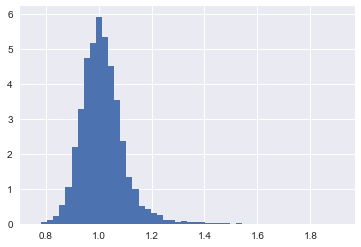

1.00685 1.01423821218


In [68]:
plt.hist(small_ex, normed=True, bins=50)
plt.show()
print(np.median(small_ex), np.mean(small_ex))


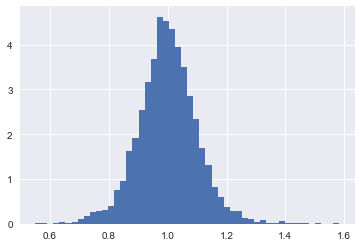

0.9985 0.999781043802


In [69]:
plt.hist(large_ex, normed=True, bins=50)
plt.show()
print(np.median(large_ex), np.mean(large_ex))

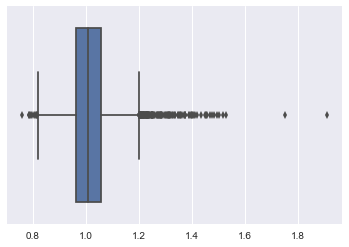

In [70]:
sns.boxplot(small_ex)
plt.show()

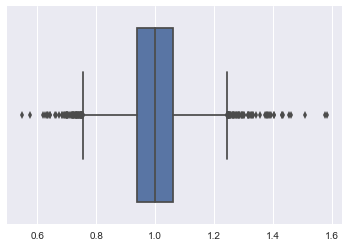

In [71]:
sns.boxplot(large_ex)
plt.show()

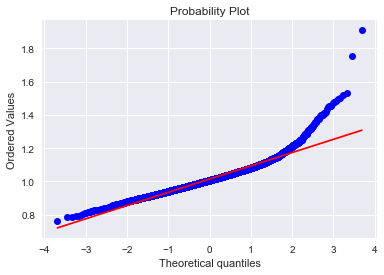

In [72]:
# normality test
import pylab
# quantile plot
stats.probplot(small_ex, dist="norm", plot=pylab)
plt.show()


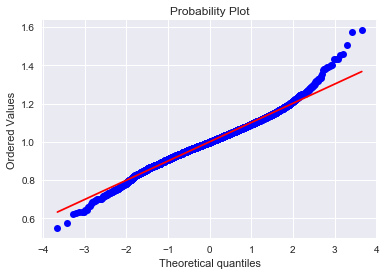

In [73]:
stats.probplot(large_ex, dist="norm", plot=pylab)
plt.show()


Graphically we can conclude that the distributions are normal with the exception of some outliers skewing the plots. Having a normal distribution will allow us to apply the z-test in order to test the hypothesis again.

Two sample z-test formula:
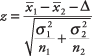

In [74]:
mean_diff = diff_of_means(small_ex, large_ex)

z = mean_diff / np.sqrt( (small_ex.var() / len(small_ex)) + (large_ex.var() / len(large_ex)) )

z_critical = stats.norm.ppf(q = 0.99)
print('z-critical:', z_critical)
print('z-value:', z)

# p_val, multiply by 2 for two-tail test
p_value = stats.norm.cdf(-z)*2
print('p-value:', p_value)

z-critical: 2.32634787404
z-value: 8.31444844524
p-value: 9.21799636061e-17


**H0**: small cap hospitals (< 300) and large cap hospitals (> 300) have *EQUAL* mean Excess Readmission Ratio

**HA**: small and large cap hospitals' mean Excess Readmission Ratio is *NOT EQUAL*

Again, the p-value is essentially zero and the z-value (8.31) being extremely large tells us to reject the null hypothesis. As a result, alternate hypothesis is accepted; small and large capacity hospitals' mean excess readmission ratio is not equal. 

In [75]:
# print correlation
print('Correlation between readmission rates and hospital capacity')
r1 = pearson_r(small['Excess Readmission Ratio'].values, small['Number of Discharges'].values)
print('small cap corr:', r1)
r2 = pearson_r(large['Excess Readmission Ratio'].values, large['Number of Discharges'].values)
print('large cap corr:', r2)

Correlation between readmission rates and hospital capacity
small cap corr: -0.0364887132525
large cap corr: -0.0748316281702


### Correlation Hypothesis Test

As shown above, there is a correlation between Excess Readmission Ratio and Number of Discharges for small and large capacity hospitals. However, since the correlations are relatively small (near 0), we must ask, are they statistically significant? We can test for significance using a hypothesis test for each hospital capacity.

**H0**: there is no correlation between Excess Readmission Ratio and Number of Discharges

**HA**: there is correlation between Excess Readmission Ratio and Number of Discharges

Approach:
* simulate the null hypothesis, both variables are independent of each other
* for each permutation, compute pearson-r correlation
* compute how many permutations have pearson-r geater than the observed correlation


In [76]:
# create replicates for small hospital

observed_r = pearson_r(small['Excess Readmission Ratio'], small['Number of Discharges'])

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    ratio_permuted = np.random.permutation(small['Excess Readmission Ratio'])
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(ratio_permuted, small['Number of Discharges'])


pr = np.sum(perm_replicates > observed_r)/len(perm_replicates)
print('p-value:', pr)  
print('observed correlation:', observed_r)


p-value: 0.9981
observed correlation: -0.0364887132525


In [77]:
# create replicates for large hospital

observed_r = pearson_r(large['Excess Readmission Ratio'], large['Number of Discharges'])

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    ratio_permuted = np.random.permutation(large['Excess Readmission Ratio'])
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(ratio_permuted, large['Number of Discharges'])


pr = np.sum(perm_replicates > observed_r)/len(perm_replicates)
print('p-value:', pr)  
print('observed correlation:', observed_r)

p-value: 1.0
observed correlation: -0.0748316281702


The p-value of about 1 tells us that we cannot reject the null hypothesis of there being no correlation between Excess Readmission Ratio and Number of Discharges. The observed correlation is not statistically significant. A similiar conclusion can be drawn by looking at the fact that -0.075 and -0.036 are both very close to zero and such small correlation may have occured by chance. 

In [144]:
# print correlation
smaller = df[df['Number of Discharges'] < 100]
larger = df[df['Number of Discharges'] > 100]
print('Correlation between readmission rates and hospital capacity')
r1_smaller = pearson_r(smaller['Excess Readmission Ratio'].values, smaller['Number of Discharges'].values)
r2_larger = pearson_r(larger['Excess Readmission Ratio'].values, larger['Number of Discharges'].values)

print('smaller cap (<100) corr:', r1_smaller)
print('large cap (>100) corr:', r2_larger)
print('Number of small cap (<100) hospitals:', len(smaller))


Correlation between readmission rates and hospital capacity
smaller cap (<100) corr: -0.244635500335
large cap (>100) corr: -0.0852118182811
Number of small cap (<100) hospitals: 1188


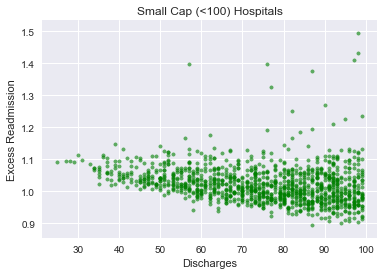

Excess Readmission Ratio
Mean: 1.0226183501683506
Standard Deviation: 0.05795419632801004
smaller cap (<100) corr: -0.244635500335


In [145]:

x1 = smaller['Number of Discharges'].values
y1 = smaller['Excess Readmission Ratio'].values 
plt.scatter(x1, y1, marker='.', alpha=0.6, color='green') # small cap
plt.xlabel('Discharges')
plt.ylabel('Excess Readmission')
plt.title('Small Cap (<100) Hospitals')
plt.show()
print('Excess Readmission Ratio')
print('Mean:', np.mean(smaller['Excess Readmission Ratio']))
print('Standard Deviation:', np.std(smaller['Excess Readmission Ratio']))
print('smaller cap (<100) corr:', r1_smaller)

When looking at the hospitals with capacity less than or equal to 100, a more obvious trend can be detected as the pearson-r correlation suggests. 

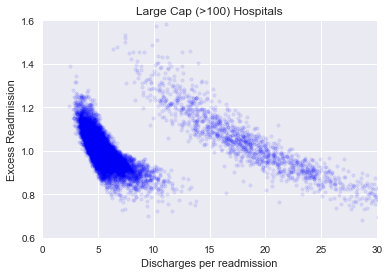

Excess Readmission Ratio
Mean: 1.0057676562195774
Standard Deviation: 0.09504091087700683
large cap (>100) corr: -0.0852118182811


In [146]:
x2 = larger['Number of Discharges'].values / larger['Number of Readmissions'].values
y2 = larger['Excess Readmission Ratio'].values 
plt.scatter(x2, y2, marker='.', alpha=0.1, color='blue') # large cap
plt.xlabel('Discharges per readmission')
plt.ylabel('Excess Readmission')
plt.xlim([0,30])
plt.ylim([0.6,1.6])
plt.title('Large Cap (>100) Hospitals')
plt.show()
print('Excess Readmission Ratio')
print('Mean:', np.mean(larger['Excess Readmission Ratio']))
print('Standard Deviation:', np.std(larger['Excess Readmission Ratio']))
print('large cap (>100) corr:', r2_larger)

For hospitals with capacity greater than 100, there is some general down trend to be noted, although, the correlation is quite small. 

### Conclusion

In terms of pearson-r correlation, there is no statistical significance between hospital capacity and the readmission rates as stated in the preliminary analysis. Such a small correlation may have occured purely chance. The mean excess readmission ratio can be said to be statistically significant between the small and large capacity hospitals. Although, statistically significant, the difference in ratios is quite small from a practical stand point when comparing hospital capacity of small (< 300) and large (> 300).

However, when computing the correlation for small hospitals with very low capacity (< 100) we begin to see a more profound correlation between capacity and excess readmission rates. As discussed in the preliminary report, "small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation". However, capacity number should be revised to focus on hospitals with a capacity less than 100 instead of 300. There is no statistical significance in mean excess readmission rates between hospitals which have capacity less than 300 and greater than 300. 

